In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [15]:
# def gaussiana(x, sigma, mi):
#     return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - mi)**2/(2*sigma**2)) + 600

def gaussiana(x, sigma, mi, a, H):
    return a*np.exp(-(x - mi)**2/(2*sigma**2)) + H

def gaussiana_fit(dados_x, dados_y):

    media = sum(dados_x*dados_y)/sum(dados_y)
    sigma =np.sqrt(sum(dados_y* (dados_x - media)**2)/sum(dados_y))
    popt, pcov = curve_fit(
    f = gaussiana,
    xdata = dados_x,
    ydata = dados_y,
    p0 = [media, sigma, 1, 1],
    maxfev=50000
)
    return [popt, np.sqrt(np.diag(pcov))]

In [16]:
gauss_nacl = pd.read_csv('./Dados/nacl_26.csv',sep='\s', decimal=',')
gauss_nacl_x = np.array(gauss_nacl['Ângulo'])
gauss_nacl_y = np.array(gauss_nacl['R'])
c = 299792458
h = 4.135668e-15
d = 2.82e-10
gauss_nacl_x_e = 1e-3 * h*c/(2*d*np.sin(gauss_nacl_x * np.pi/180))


C:\Users\victo\AppData\Local\Temp\ipykernel_3272\2486215214.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_nacl = pd.read_csv('./Dados/nacl_26.csv',sep='\s', decimal=',')


Plot

In [17]:
# par = gaussiana_fit(gauss_nacl_x[35:45], gauss_nacl_y[35:45])
# par[1]

In [18]:
par = gaussiana_fit(gauss_nacl_x[35:45], gauss_nacl_y[35:45])
x_model = np.linspace(min(gauss_nacl_x[35:45]), max(gauss_nacl_x[35:45]))  
gaussiana(x_model, par[0][0], par[0][1], par [0][2], par[0][3])



array([251.47253965, 251.47945149, 251.49258443, 251.51689763,
       251.56074949, 251.63779497, 251.76963914, 251.98935551,
       252.34586878, 252.90900527, 253.77472197, 255.06964899,
       256.95366847, 259.618897  , 263.28326958, 268.17709194,
       274.52156913, 282.49949621, 292.21995078, 303.68073485,
       316.73409133, 331.06237789, 346.17043306, 361.39998186,
       375.96855944, 389.03142288, 399.76048283, 407.43037362,
       411.49936111, 411.67258377, 407.93737702, 400.56480388,
       390.07713512, 377.18669688, 362.71602766, 347.5117491 ,
       332.36456495, 317.94555474, 304.76510898, 293.15642088,
       283.28136962, 275.15364253, 268.67242243, 263.65990226,
       259.89696775, 257.15313319, 255.20872865, 253.86902499,
       252.9712069 , 252.38579141])

In [19]:
par[1][0]

0.023413880409851852

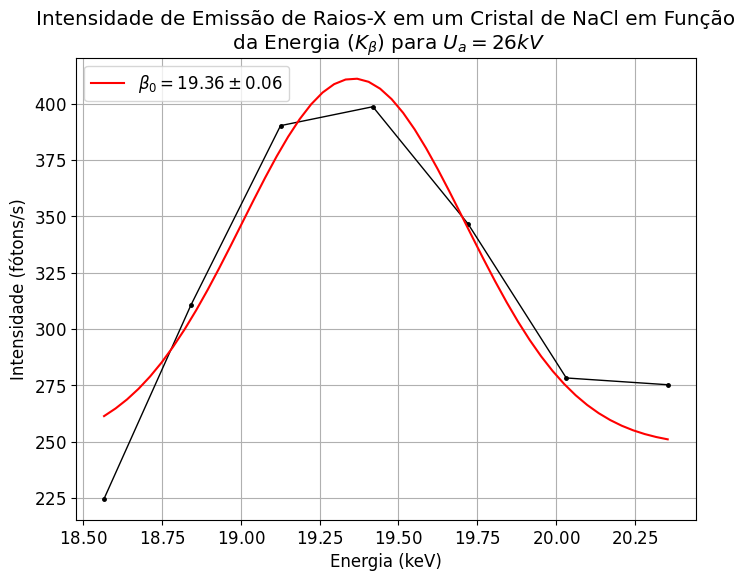

In [20]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$\\beta_0 = {par[0][1]:.4} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x_e[37:44], gauss_nacl_y[37:44], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_nacl_x_e[37:44], gauss_nacl_y[37:44], 'red')

# grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de NaCl em Função\n da Energia ($K_\\beta$) para $U_a = 26kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


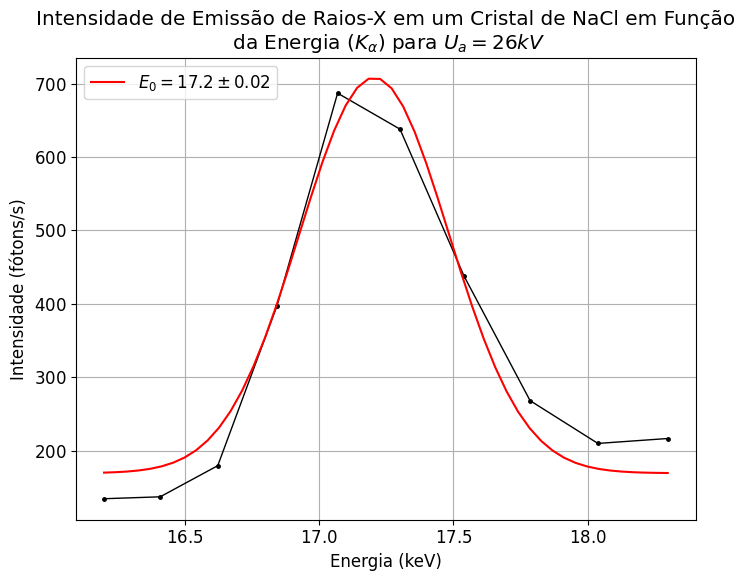

In [21]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$E_0 = {par[0][1]:.4} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x_e[44:54], gauss_nacl_y[44:54], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_nacl_x_e[44:54], gauss_nacl_y[44:54], 'red')

#grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de NaCl em Função\n da Energia ($K_\\alpha$) para $U_a = 26kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [22]:
i = 0
while gauss_nacl_y[i] < max(gauss_nacl_y)*0.05:
    i += 1
i = 0
while gauss_nacl_y[i] < max(gauss_nacl_y)*0.05:
    i += 1
l = 2*d*np.sin(gauss_nacl_x[i]*np.pi/180)
h = 10e3*26*l/c
h

4.093004549917911e-14

In [23]:
gauss_nacl_x[i]

4.8

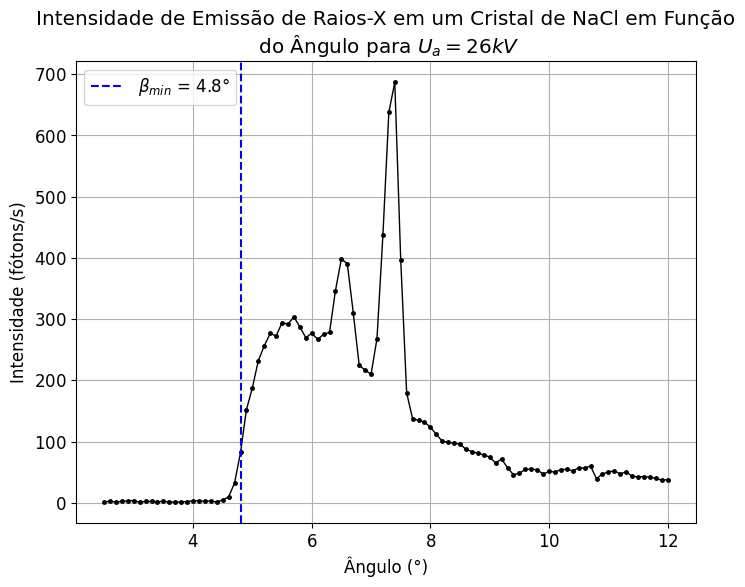

In [26]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_y, marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste

grafico.axvline(x = gauss_nacl_x[i], color = 'blue', label = '$\\beta_{min}$ =' + f'{gauss_nacl_x[i]: .2}°', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Ângulo (°)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de NaCl em Função\n do Ângulo para $U_a = 26kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()
